# Project 11  - TensorFlow - using Python
## Nhi Le
## DATA 4319 

**TensorFlow** is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

**Tensorflow** is a symbolic math library based on dataflow and differentiable programming. It is used for both research and production at Google.
![](https://upload.wikimedia.org/wikipedia/commons/1/11/TensorFlowLogo.svg)

Developed by Google in 2011 under the name DistBelief, TensorFlow was officially released in 2017 for free. The library is able to run on multiple CPUs and GPUs and is available across multiple platforms, including mobile. The name comes from multidimensional arrays known as tensors, which are commonly used in neural networks.

**Machine Learning Applications of TensorFlow**

As a software library created by Google, many of the initial applications were performed by the company itself. For example, RankBrain, a machine learning search algorithm, uses TensorFlow backing. RankBrain is able to restructure online search results to provide users with the most relevant responses to given search queries.

In [9]:
#pip install numpy --upgrade
#pip install tensorflow

In [10]:
#import package
import tensorflow as tf

### Data Description 
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [13]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.43426195,  0.3411188 , -0.35635626,  0.14009185, -0.21518482,
        -0.0437465 , -0.10267307, -0.27522123, -0.5958161 ,  0.65359044]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [14]:
tf.nn.softmax(predictions).numpy()

array([[0.14428383, 0.13145167, 0.06544199, 0.10751305, 0.07536444,
        0.08945842, 0.08433925, 0.07097297, 0.05150631, 0.17966802]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [16]:
loss_fn(y_train[:1], predictions).numpy()

2.4139814

In [17]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [18]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 573us/step - loss: 0.2938 - accuracy: 0.9155
Epoch 2/5
1875/1875 [==============================] - 1s 539us/step - loss: 0.1396 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 1s 532us/step - loss: 0.1056 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 1s 542us/step - loss: 0.0861 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 1s 534us/step - loss: 0.0728 - accuracy: 0.9771


In [19]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0716 - accuracy: 0.9779


[0.07157985121011734, 0.9779000282287598]

In [20]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [21]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.59666868e-07, 5.82609072e-09, 1.24252665e-05, 9.99573385e-04,
        1.14631478e-10, 5.82382995e-07, 1.12993148e-11, 9.98919845e-01,
        6.89325191e-07, 6.66595224e-05],
       [2.56775294e-08, 4.06198706e-06, 9.99994397e-01, 1.41642738e-06,
        1.70647405e-12, 1.67836838e-08, 8.89543816e-09, 1.24237382e-15,
        1.57711213e-07, 4.40984563e-14],
       [1.07643564e-05, 9.97502387e-01, 3.18089704e-04, 4.04554194e-05,
        4.63504664e-04, 8.49064309e-05, 1.59914525e-05, 9.81565914e-04,
        5.78260049e-04, 4.01957732e-06],
       [9.99850750e-01, 2.35417952e-09, 8.65327911e-06, 1.57326774e-08,
        1.51912855e-06, 7.38029712e-06, 1.26508370e-04, 4.02525160e-07,
        1.87655232e-07, 4.47076627e-06],
       [1.39215899e-07, 4.55450113e-08, 9.66245352e-06, 2.43879413e-07,
        9.98878300e-01, 1.34358189e-07, 2.30531737e-06, 4.50059233e-05,
        6.82076006e-07, 1.06342195e-03]], dtype=float32)>

In [22]:
import numpy as np

In [23]:
np.argmax(probability_model(x_test[:5])[3])

0

In [24]:
y_test[3]

0

In [37]:
import matplotlib
import matplotlib.pyplot as plt

def predict_image(i):
  print("Predict: ",np.argmax(probability_model(x_test)[i]))
  print("Label: ",y_test[i])
  plt.imshow(x_test[i])

Predict:  3
Label:  3


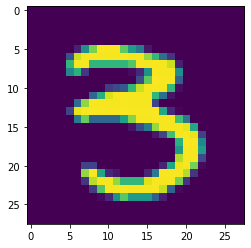

In [38]:
i=np.random.randint(0,10000,1).item()
predict_image(i)

Predict:  2
Label:  2


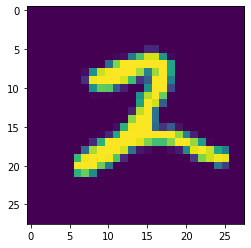

In [39]:
i=np.random.randint(0,10000,1).item()
predict_image(i)

Predict:  8
Label:  8


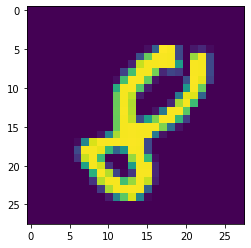

In [40]:
i=np.random.randint(0,10000,1).item()
predict_image(i)

Predict:  6
Label:  6


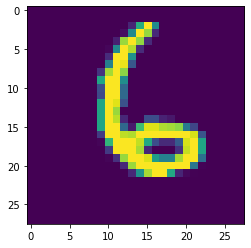

In [41]:
i=np.random.randint(0,10000,1).item()
predict_image(i)

Predict:  5
Label:  5


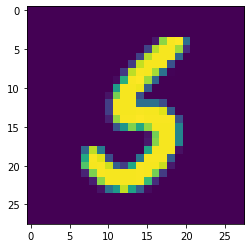

In [42]:
i=np.random.randint(0,10000,1).item()
predict_image(i)

### Conclusion:
The Tensorflow package is more implement than the Neural Network from scrath that we build before :) Mine Neural Network code need more than 10 minutes to train a model, but this one run in 30 seconds. :D